 ![title](images/team_cheer.jpg)

# Football Player's Transfer Value Analysis

- Student name: Filippe Fontenele
- Student pace: part-time
- Instructor name: Rajive Islam

## Overview

Football is often referred as the world game. Football players are some of the highest paid athletes in the world but the goal of this project is finding what are the main predictors for their transfer values. In this notebook, I will use a sample data from players around the world and through data analysis go throug their on-field performances, atributes, different transfer fees to reach a machine learning model that will satisfy our question.

## Business Problem

This project is aimed at helping footbal clubs when they are scouting potential new signings in the transfer market. Football is as big as a business as any other and players are an asset so before investing in an asset, clubs are better off having a tool to assess their investiment. Of course we are still talking about humans that are subject to their environment, but we are confident that by the end of our analysis, we will have a model that will help football clubs around the world make better signings.

## OSEM

For such important project, I find it imperative to utilize a strong Data Science process. I will follow the OSEMN (Obtain, Scrub, Explore, Interpret) process to help me keep a clean, focused and clear structure.

In [1]:
# import some important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor,  plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### OBTAIN

In this case we have a database comprised of information such as age, height, playing position, as well as professional statistics like goal scoring, assists (in 2 seasons 2021-2022 and 2022-2023), injuries, along with total individual and team awards in their career. First step is just bring the data into the notebook and analyse it.

In [3]:
df = pd.read_csv("data/final_data.csv")
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


Looking at the data, "goals," "assists," "yellow cards," "second yellow cards," "red cards," "goals conceded," and "clean sheets," look almost like percentage values and the explanation is that they were transformed to a per 90 minutes basis. This transformation involved dividing each statistical value by the corresponding per 90 value (calculated as minutes played divided by 90).

Explanation of the variables:
- `player`: the link to the Transfermarkt page contains player data. Please add a prefix "www.transfermarkt.com/   
- `team`: name of the team that player played for at the time data was collected                
- `name`: name of the player              
- `position`: Position that player played most            
- `height`: height of player, cm unit             
- `age`: age of player             
- `appearance`: The number of times a player appear on field           
- `goals`: goals scored              
- `assists`: assits to goals              
- `yellow cards`: per/90min  
- `second yellow cards`: number of time player get 2 yellow card in 1 match  
- `red cards`: per/90min        
- `goals conceded`: only Goalkeeper     
- `clean sheets`: only Goalkeeper      
- `minutes played`: Total
- `days_injured`: Total
- `games_injured`: Total 
- `award`: total awarđ in whole career              
- `current_value`: Valuated price, Euro unit     
- `highest_value`: Highest valuated price in the past, Euro unit   
- `position_encoded`: Goalkeeper – 1, Defender – 2, midfield – 3, Attack - 4
- `winger`: 1: winger, 0: not a winger             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [5]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [6]:
# Take a look at the shape of the dataframe
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 10754 rows and 22 columns in the dataset.


In [7]:
# Understanding the datatypes
print(df.dtypes.value_counts())

int64      9
float64    9
object     4
dtype: int64


In [8]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


### Scrub

We will search for any missing information in the dataset.

 As we can see below, this dataset has no null values. As a curiosity, I will visualise `position_encoded` and `winger` as it seems whoever prepared this dataset already did in a way to make it easier for a predictive model. But, it might be worth it looking at the `position` column and making an executive decision on what to do.

In [9]:
df['position_encoded'].value_counts()

2    3528
3    3095
4    2902
1    1229
Name: position_encoded, dtype: int64

In [10]:
df['winger'].value_counts()

0    7447
1    3307
Name: winger, dtype: int64

In [11]:
df['position'].value_counts()

Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: position, dtype: int64

In [12]:
# Predicting GK price is different than outfield players
# We will drop GK from the dataset and clean_sheets / goals conceded column as well
df = df[df['position'] != 'Goalkeeper']
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.0,0.0,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.0,0.0,416,932,169,7,2000000,20000000,2,0


In [13]:
df1 = df.drop(['player', 'clean sheets', 'goals conceded'], axis=1)
df1.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0


In [14]:
# it worked
df1['position'].unique()

array(['Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [15]:
# no null values in the dataset, great news
df1.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Explore

Next, I will plot graphics and look at the features available. During this phase, we will divide or features and analyse their relationship with our target variable `current_value`.

<Figure size 864x576 with 0 Axes>

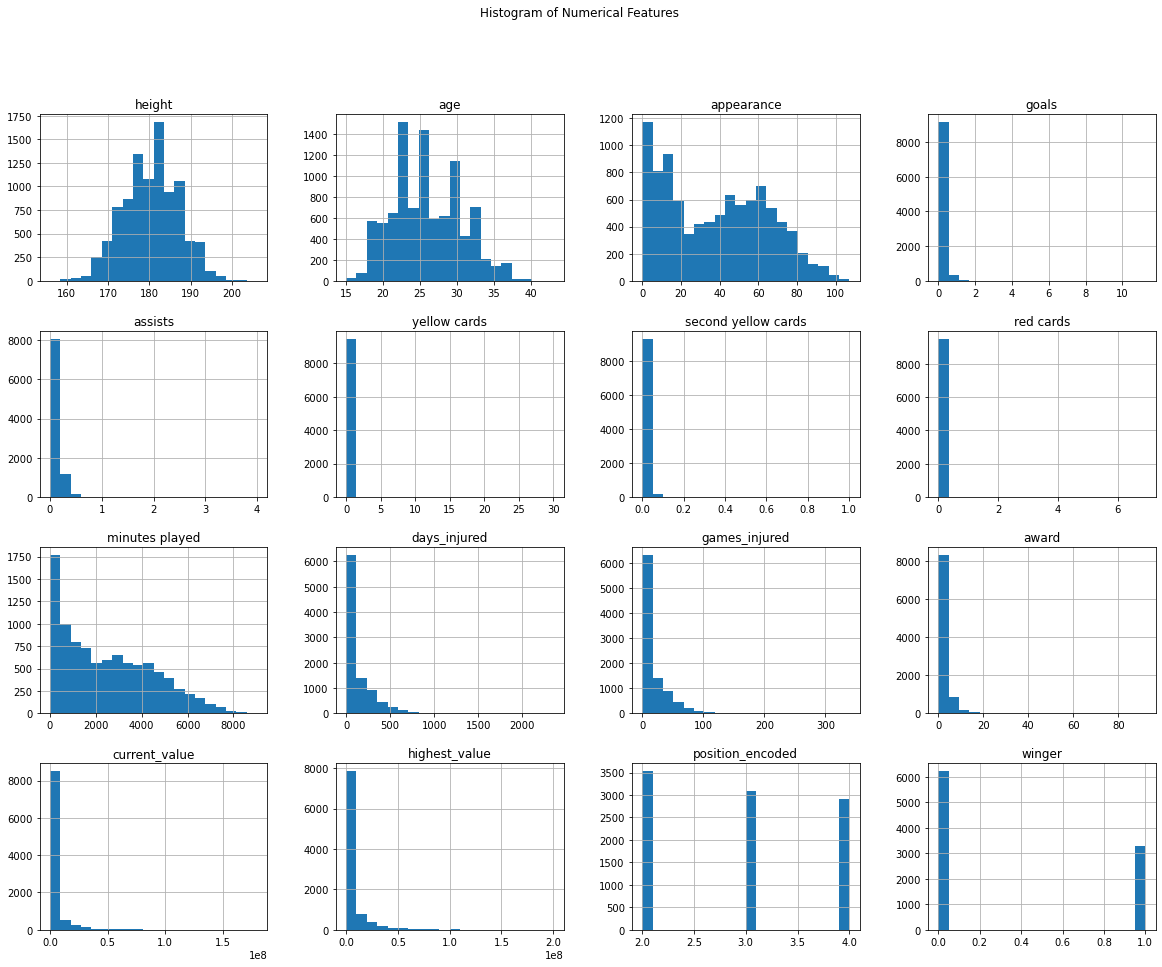

In [16]:
# visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
df1.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram of Numerical Features')
plt.show()

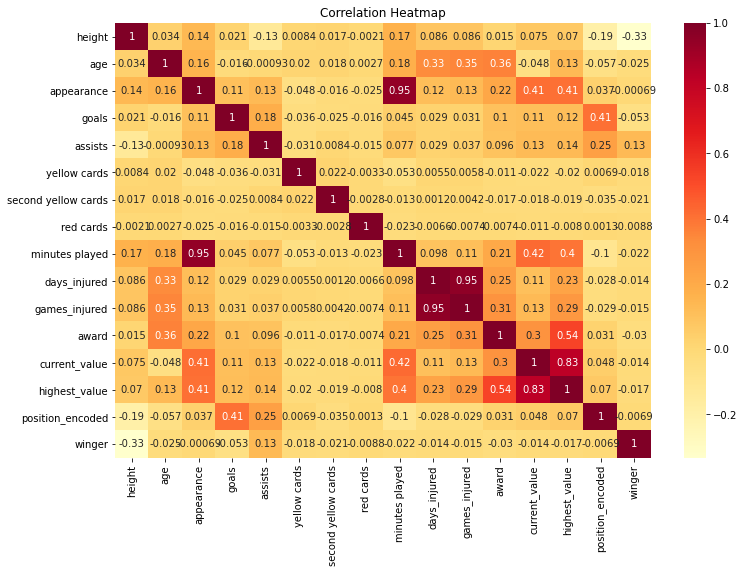

In [17]:
# Analyze the relationship between features
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

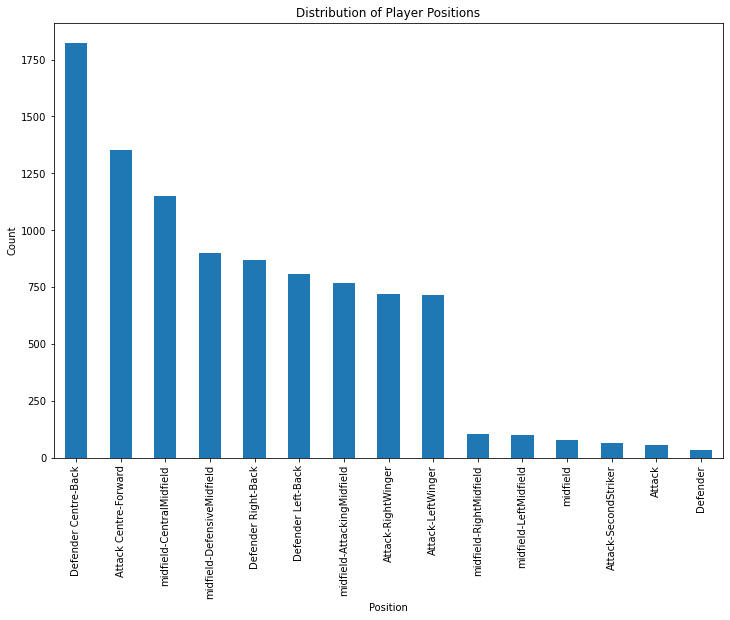

In [18]:
# 5. Visualize the distribution of categorical features
plt.figure(figsize=(12, 8))
df1['position'].value_counts().plot(kind='bar')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

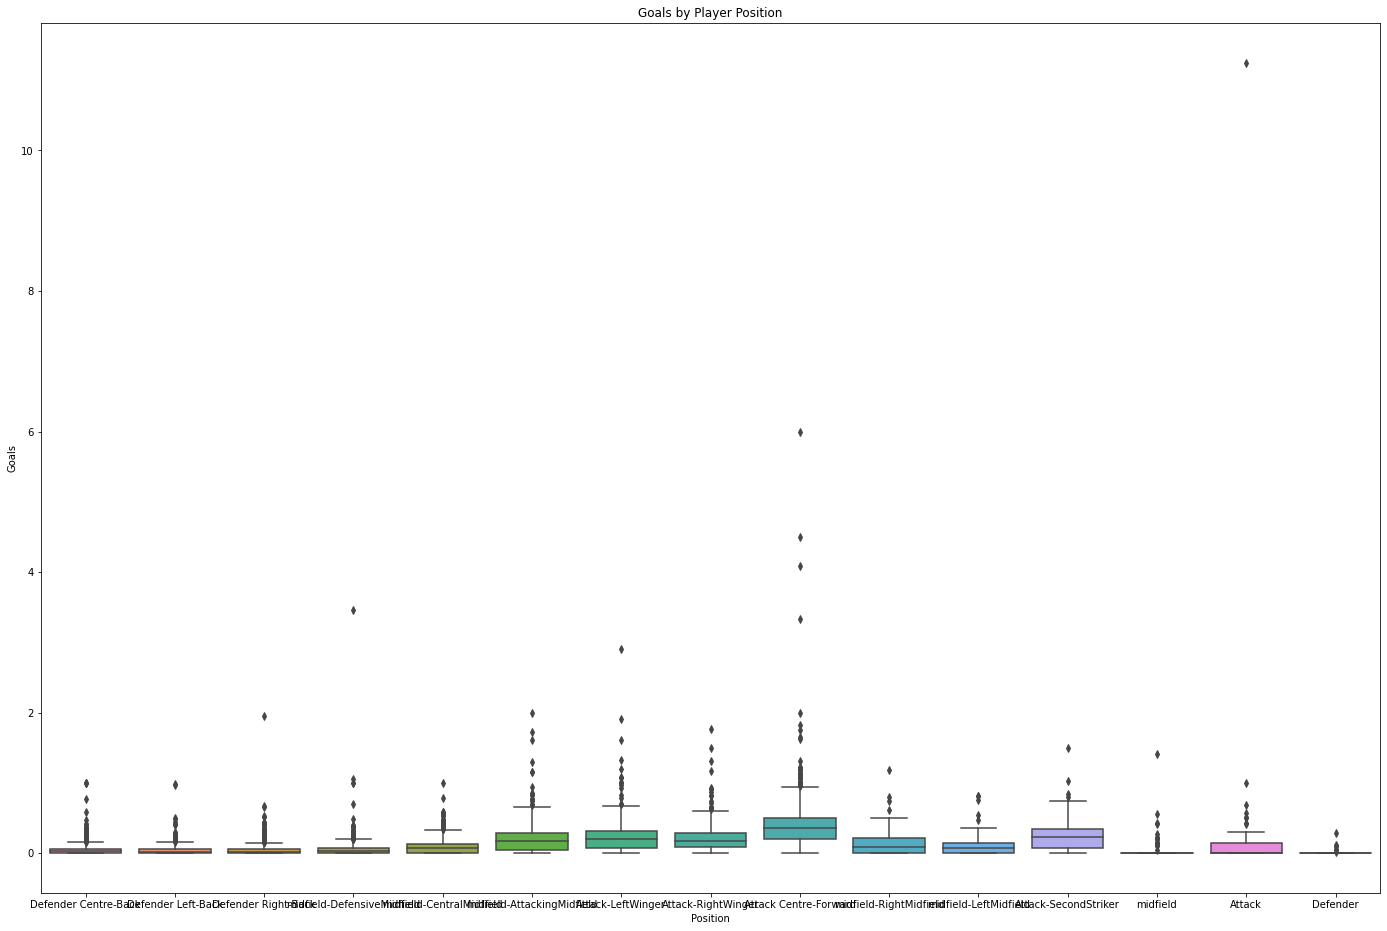

In [19]:
# 6. Analyze the relationship between numerical and categorical features
plt.figure(figsize=(24, 16))
sns.boxplot(x='position', y='goals', data=df1)
plt.title('Goals by Player Position')
plt.xlabel('Position')
plt.ylabel('Goals')
plt.show()

In [20]:
# Investigate the top players based on performance metrics
top_players = df1.nlargest(15, 'goals')
print(top_players[['position', 'goals', 'assists', 'minutes played']])

                         position      goals   assists  minutes played
9239                       Attack  11.250000  0.000000               8
3799        Attack Centre-Forward   6.000000  0.000000              15
8547        Attack Centre-Forward   4.500000  0.000000              60
7596        Attack Centre-Forward   4.090909  0.000000              44
8843   midfield-DefensiveMidfield   3.461538  0.000000              26
8727        Attack Centre-Forward   3.333333  0.000000              27
8260            Attack-LeftWinger   2.903226  0.000000              31
3308        Attack Centre-Forward   2.000000  0.000000              45
10666  midfield-AttackingMidfield   2.000000  0.000000              45
7636          Defender Right-Back   1.956522  1.956522              46
3664            Attack-LeftWinger   1.914894  0.000000              47
3172        Attack Centre-Forward   1.818182  0.000000              99
6960           Attack-RightWinger   1.764706  1.764706             102
8694  

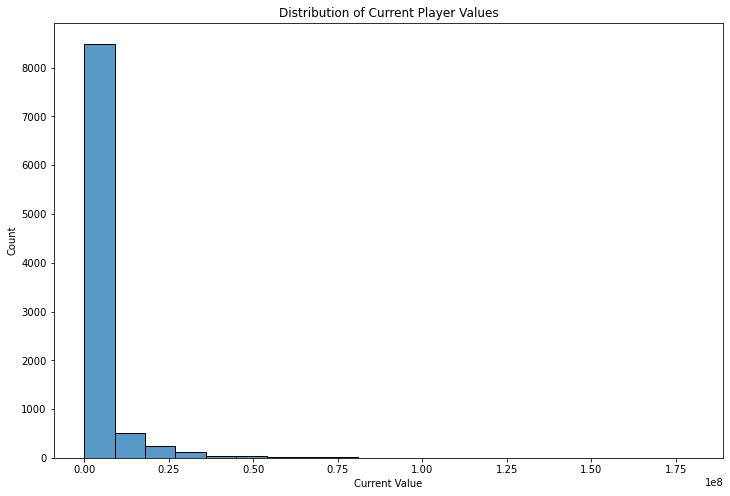

In [21]:
# Analyze the distribution of player values
plt.figure(figsize=(12, 8))
sns.histplot(df1['current_value'], bins=20)
plt.title('Distribution of Current Player Values')
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.show()

In [22]:
# Calculate the outliers for the numerical features (excluding 'current_value')
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('current_value')

for feature in numerical_features:
    mean = df1[feature].mean()
    std = df1[feature].std()
    threshold = 3
    
    outliers = df1[(df1[feature] < mean - threshold * std) | (df1[feature] > mean + threshold * std)][feature]
    print(f"Outliers for '{feature}': {outliers.tolist()}")

Outliers for 'height': [206.0, 160.0, 160.0, 160.0, 202.0, 160.0, 202.0, 160.0, 202.0, 160.0, 160.0, 156.0, 160.0, 160.0, 159.0, 160.0, 160.0, 160.0, 160.0, 202.0, 160.0, 160.0]
Outliers for 'age': [41.0, 40.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 42.0, 40.0, 40.0, 43.0, 40.0]
Outliers for 'appearance': []
Outliers for 'goals': [1.118269673, 0.8811531140000001, 1.177927131, 0.91234347, 0.964974982, 1.015625, 0.894039735, 0.9384422109999999, 1.3043478259999999, 1.153846154, 0.963081862, 1.0992366409999998, 1.8181818180000002, 1.651376147, 0.97826087, 2.0, 0.940766551, 0.947368421, 1.232876712, 1.914893617, 1.0, 0.882352941, 0.927835052, 1.3170731709999999, 0.9375, 1.119751166, 6.0, 1.14633456, 1.010682005, 1.0843373490000001, 0.9032846720000001, 1.619537275, 0.938981979, 0.967741935, 0.936639118, 1.058823529, 0.9090909090000001, 0.935064935, 1.171875, 1.184210526, 0.97826087, 1.764705882, 1.417322835, 1.0, 0.916496945, 1.011235955, 1.3170731709999999, 0.966010733, 4.090909091, 0.93506493

In [31]:
# Handle outliers
from scipy.stats import zscore
z = abs(zscore(df1[['height','goals', 'assists', 'yellow cards','yellow cards', 'days_injured', 'games_injured', 'award', 'highest_value']]))
df1_clean = df1[(z < 3).all(axis=1)]

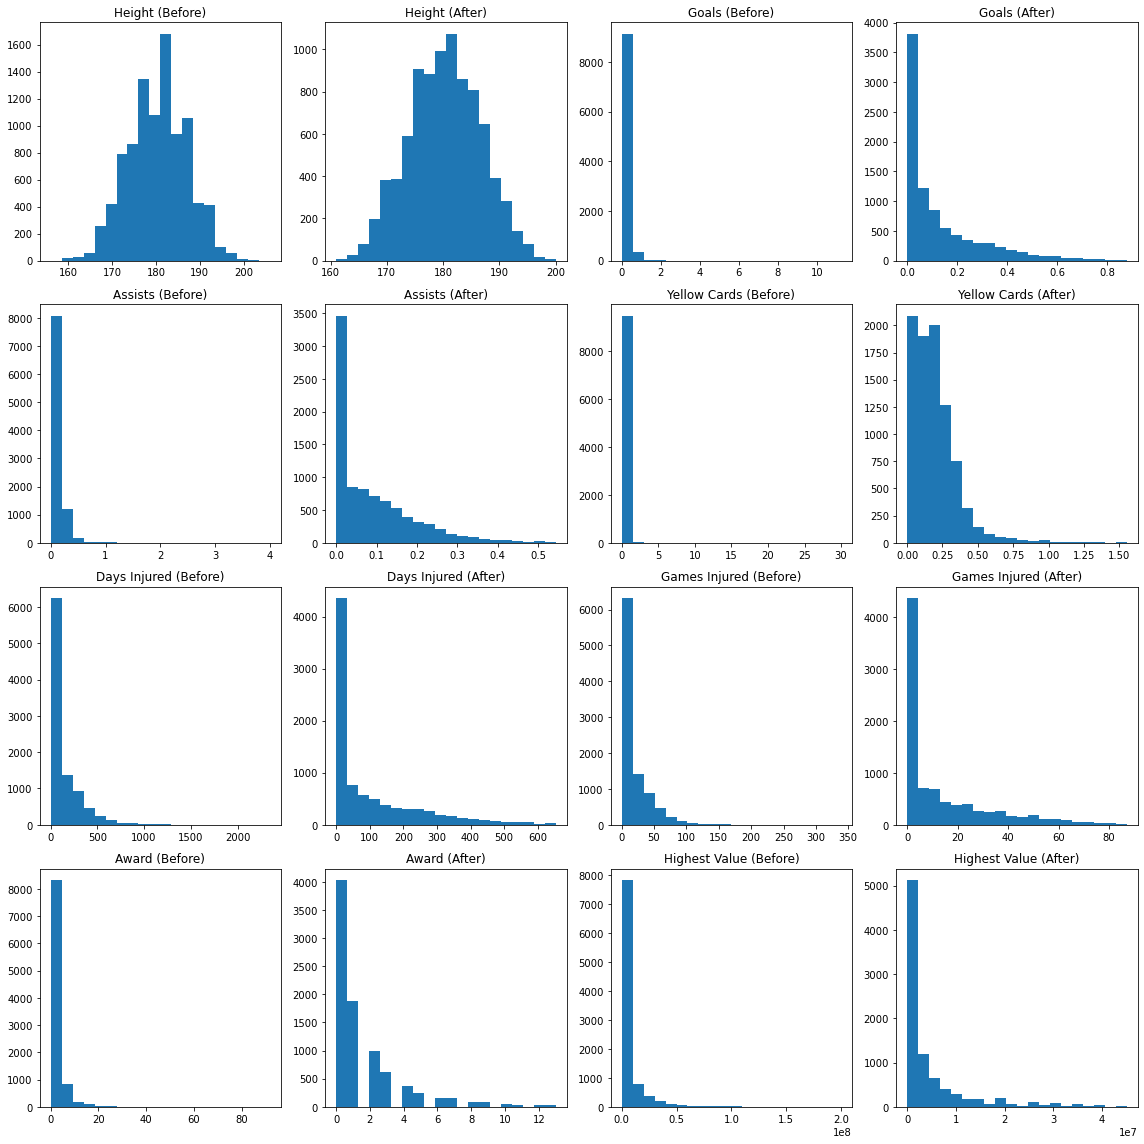

In [26]:
# Create the comparative histograms
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Height
axes[0, 0].hist(df1['height'], bins=20)
axes[0, 0].set_title('Height (Before)')
axes[0, 1].hist(df1_clean['height'], bins=20)
axes[0, 1].set_title('Height (After)')

# Goals
axes[0, 2].hist(df1['goals'], bins=20)
axes[0, 2].set_title('Goals (Before)')
axes[0, 3].hist(df1_clean['goals'], bins=20)
axes[0, 3].set_title('Goals (After)')

# Assists
axes[1, 0].hist(df1['assists'], bins=20)
axes[1, 0].set_title('Assists (Before)')
axes[1, 1].hist(df1_clean['assists'], bins=20)
axes[1, 1].set_title('Assists (After)')

# Yellow Cards
axes[1, 2].hist(df1['yellow cards'], bins=20)
axes[1, 2].set_title('Yellow Cards (Before)')
axes[1, 3].hist(df1_clean['yellow cards'], bins=20)
axes[1, 3].set_title('Yellow Cards (After)')

# Days Injured
axes[2, 0].hist(df1['days_injured'], bins=20)
axes[2, 0].set_title('Days Injured (Before)')
axes[2, 1].hist(df1_clean['days_injured'], bins=20)
axes[2, 1].set_title('Days Injured (After)')

# Games Injured
axes[2, 2].hist(df1['games_injured'], bins=20)
axes[2, 2].set_title('Games Injured (Before)')
axes[2, 3].hist(df1_clean['games_injured'], bins=20)
axes[2, 3].set_title('Games Injured (After)')

# Award
axes[3, 0].hist(df1['award'], bins=20)
axes[3, 0].set_title('Award (Before)')
axes[3, 1].hist(df1_clean['award'], bins=20)
axes[3, 1].set_title('Award (After)')

# Highest Value
axes[3, 2].hist(df1['highest_value'], bins=20)
axes[3, 2].set_title('Highest Value (Before)')
axes[3, 3].hist(df1_clean['highest_value'], bins=20)
axes[3, 3].set_title('Highest Value (After)')

plt.tight_layout()
plt.show()

In [27]:
df1_clean.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
9,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,5854,443,70,4,35000000,42000000,2,1
10,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,7132,182,15,3,22000000,22000000,2,1
11,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.0,2686,175,28,1,10000000,12000000,2,1


In [28]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8752 entries, 6 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 8752 non-null   object 
 1   name                 8752 non-null   object 
 2   position             8752 non-null   object 
 3   height               8752 non-null   float64
 4   age                  8752 non-null   float64
 5   appearance           8752 non-null   int64  
 6   goals                8752 non-null   float64
 7   assists              8752 non-null   float64
 8   yellow cards         8752 non-null   float64
 9   second yellow cards  8752 non-null   float64
 10  red cards            8752 non-null   float64
 11  minutes played       8752 non-null   int64  
 12  days_injured         8752 non-null   int64  
 13  games_injured        8752 non-null   int64  
 14  award                8752 non-null   int64  
 15  current_value        8752 non-null   

## Model

I will use Decision Trees for this project. In terms of efficiency, decision trees are generally considered to be efficient models, especially compared to more complex machine learning algorithms. Some key points about the efficiency of decision trees are their training speed, prediction speed and interpretability.

### Iteration 1

In [35]:
# Convert categorical variables to numerical
le = LabelEncoder()
df1_clean['team_encoded'] = le.fit_transform(df1_clean['team'])

<ipython-input-35-aee33bf27132>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['team_encoded'] = le.fit_transform(df1_clean['team'])


In [36]:
df1_clean.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_encoded
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,0.0,5471,95,19,10,15000000,35000000,2,0,226
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,0,226
9,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,5854,443,70,4,35000000,42000000,2,1,226
10,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,7132,182,15,3,22000000,22000000,2,1,226
11,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.0,2686,175,28,1,10000000,12000000,2,1,226


In [37]:
# Split the dataset
features = df1_clean[['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded', 'team_encoded']]
target = df1_clean['current_value']
X =  features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train a decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = dt_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 13967556753283.84
R-squared: 0.57


#### Model Performance
The high MSE value indicates that the model is not making very accurate predictions on the test set. The MSE represents the average squared difference between the predicted values and the actual values, so a value this high suggests the model is struggling to closely match the true target values.

However, the R-squared value of 0.57 is relatively high, meaning the model is able to explain about 57% of the variance in the target variable (current player value). This suggests the model has some predictive power, but there is still a significant amount of unexplained variance.

### Iteration 2

The Cost-Complexity Pruning (CCP) technique was applied to the decision tree regressor model to find the optimal level of pruning that balances model complexity and predictive performance. 

In [40]:
# Prepare the data
features = df1_clean[['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded', 'team_encoded']]
target = df1_clean['current_value']
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cost-Complexity Pruning (Post-Pruning)

# Train an initial, unpruned tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Perform cost-complexity pruning
path = dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of models with different levels of pruning
models = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    models.append(dt)


In [41]:
# Evaluate the models and select the best one
mse_values = []
r2_values = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

best_idx = r2_values.index(max(r2_values))
best_model = models[best_idx]
print(f'Best Model MSE: {mse_values[best_idx]:.2f}')
print(f'Best Model R-squared: {r2_values[best_idx]:.2f}')


Best Model MSE: 8513281671558.86
Best Model R-squared: 0.74


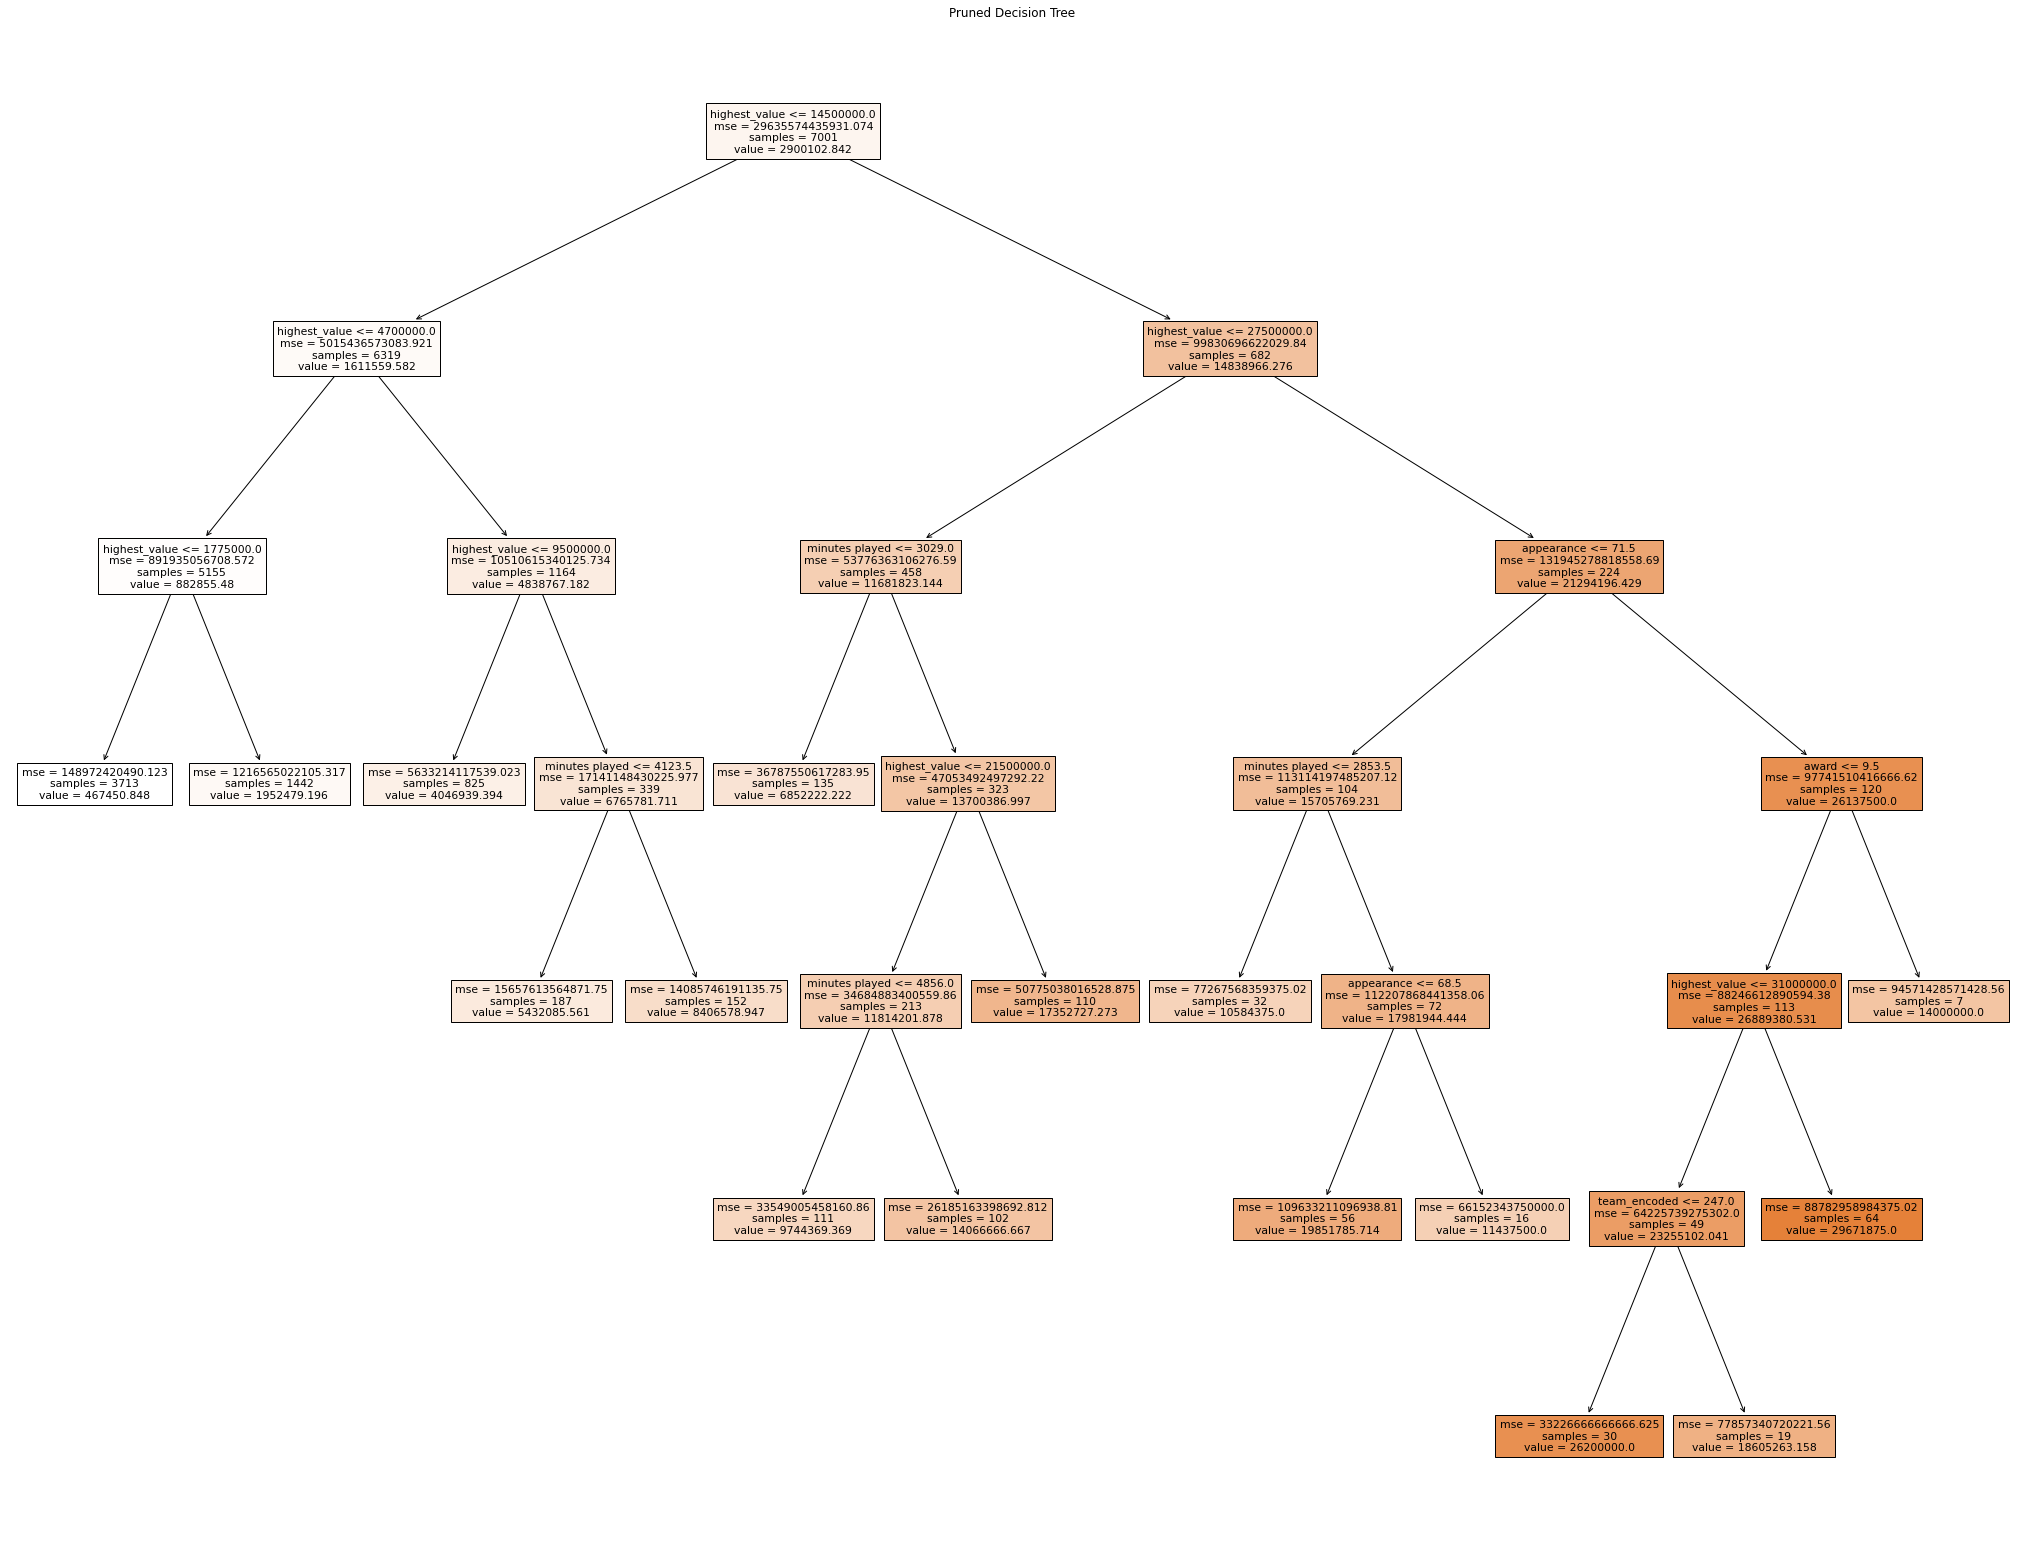

In [43]:
# Visualize the best model
plt.figure(figsize=(36, 28))
plot_tree(best_model, feature_names=features.columns, filled=True)
plt.title('Pruned Decision Tree')
plt.show()

Feature 0: highest_value - Importance: 0.8992
Feature 1: appearance - Importance: 0.0434
Feature 2: minutes played - Importance: 0.0463
Feature 3: award - Importance: 0.0068
Feature 4: assists - Importance: 0.0000
Feature 5: goals - Importance: 0.0000
Feature 6: position_encoded - Importance: 0.0000
Feature 7: team_encoded - Importance: 0.0042


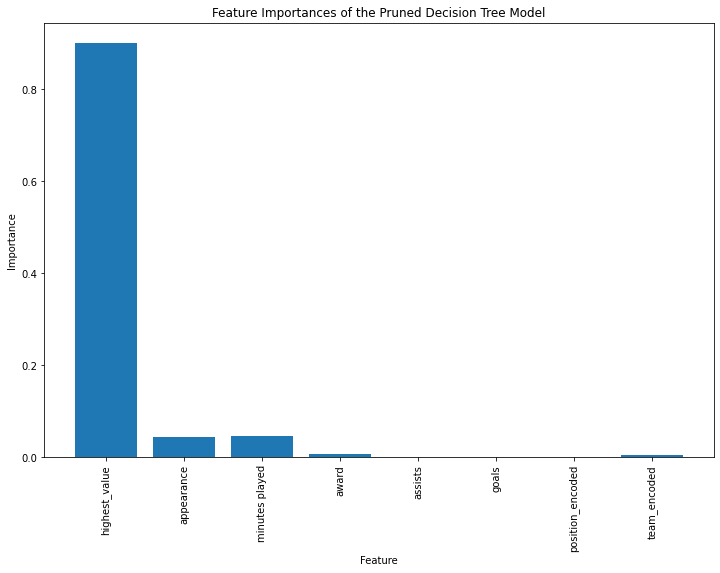

In [44]:
# Analyze the feature importance of the best pruned model
feature_importances = best_model.feature_importances_
feature_names = features.columns

# Print the feature importances
for i, (feature, importance) in enumerate(zip(feature_names, feature_importances)):
    print(f"Feature {i}: {feature} - Importance: {importance:.4f}")

# Visualize the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title("Feature Importances of the Pruned Decision Tree Model")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Iteration 3

In [47]:
# Prepare the data
features = df1_clean[['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded', 'team_encoded']]
target_log = np.log1p(df1_clean['current_value'])
X = features
y = target_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cost-Complexity Pruning (Post-Pruning)

# Train an initial, unpruned tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Perform cost-complexity pruning
path = dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of models with different levels of pruning
models = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    models.append(dt)

In [48]:
# Evaluate the models and select the best one
mse_values = []
r2_values = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

best_idx = r2_values.index(max(r2_values))
best_model = models[best_idx]

In [50]:
y_test_original = df1_clean.loc[X_test.index, 'current_value']
y_pred_original = np.expm1(best_model.predict(X_test))
mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)
print(f'Mean Squared Error (original scale): {mse_original:.2f}')
print(f'R-squared (original scale): {r2_original:.2f}')

y_pred_log = best_model.predict(X_test)
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)
print(f'Mean Squared Error (log-transformed scale): {mse_log:.2f}')
print(f'R-squared (log-transformed scale): {r2_log:.2f}')

Mean Squared Error (original scale): 12377822268775.19
R-squared (original scale): 0.61
Mean Squared Error (log-transformed scale): 0.83
R-squared (log-transformed scale): 0.84


### Conclusion

The goal of this project was to develop a predictive model for estimating the current value of football players based on various features such as appearance, minutes played, awards, assists, goals, position, and team. After going through a series of steps, including handling outliers and performing cost-complexity pruning on a decision tree regressor, we have arrived at a final model with the following performance metrics:

- Mean Squared Error (original scale): 12,377,822,268,775.19
- R-squared (original scale): 0.61
- Mean Squared Error (log-transformed scale): 0.83
- R-squared (log-transformed scale): 0.84

While the model's performance on the log-transformed scale is quite strong, with an R-squared of 0.84, the results on the original scale are less satisfactory, with an R-squared of 0.61 and a high Mean Squared Error. This suggests that the model is better able to explain the variance in the log-transformed target variable than the actual player values.